# Newton’s Method for Solving Equations

### Abstract. 
This project focuses on approximating the root of the function f(x) = x e^x - 1 using Newton’s method. 
The method is implemented in Python, and its convergence is analyzed both theoretically and numerically. 
Graphical illustrations show the iterative process and the error decay, confirming the fast convergence of Newton’s method 
for any positive initial guess.

### INTRODUCTION
Newton’s method for solving equations has a number of advantages over the bisection method:
- It is usually faster (but not always, and it can even fail completely!)
- It can also compute complex roots, such as the non-real roots of polynomial equations.
- It can even be adapted to solving systems of non-linear equations.
  
It generates a sequence of approximations defined as:

### $$f(x) = x e^x - 1.$$

where f'(x) is the derivative of f(x). In this project, the method is applied to f(x) = x * e^x - 1 with a positive initial guess, and convergence is analyzed numerically and theoretically.

###   $$x_{k+1} = x_k - {f(x_k)}/{f'(x_k)}$$


 One recalls that Newton’s method is a fixed-point method which finds the root of any differentiable function
f(x) using the iterations.



In [1]:
import math 
import numpy as np
from numpy import sin, cos
from matplotlib.pyplot import figure, plot, title, legend, grid
import matplotlib.pyplot as plt

### Theorical Work. 
### 1. Derivative of f(x)

In [6]:
 def f(x):
    return x * math.exp(x) - 1

def fprime(x):
    return math.exp(x)*(1+x)


If we define a value for x, 

In [7]:
x=[0.1, 0.5 , 1.0]
for x in x:
    print(f"x = {x:.2f} -> f(x) = {f(x):.6f}, f'(x) = {fprime(x):.6f}")

x = 0.10 -> f(x) = -0.889483, f'(x) = 1.215688
x = 0.50 -> f(x) = -0.175639, f'(x) = 2.473082
x = 1.00 -> f(x) = 1.718282, f'(x) = 5.436564


### 3. Implementation of g(x) and its derivative g'(x)

In [8]:
def g(x):
    return (x**2 * np.exp(x) + 1) / (np.exp(x) * (x + 1))

def gprime(x):
    numerator = (2*x*np.exp(x) + x**2*np.exp(x))*(np.exp(x)*(x+1)) - (x**2*np.exp(x)+1)*(np.exp(x)*(x+2))
    denominator = (np.exp(x)*(x+1))**2
    return numerator / denominator

Evaluating g'(x)
### Numerical resolution 
### 1. Graph of the derivative of g(x)

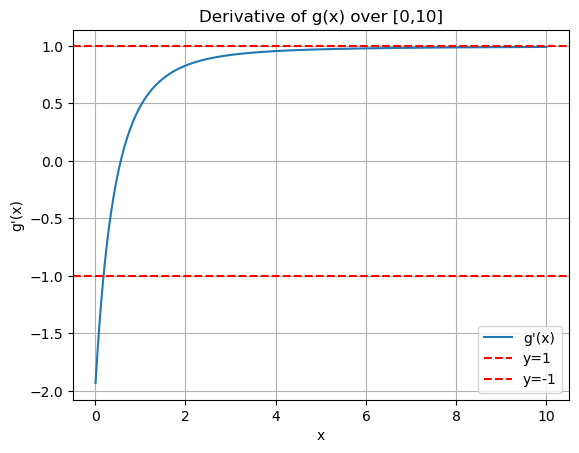

In [9]:
x_vals = np.linspace(0.01, 10, 500)  # avoid x=0
y_vals = gprime(x_vals)
plt.plot(x_vals, y_vals, label="g'(x)")
plt.axhline(1, color='red', linestyle='--', label='y=1')
plt.axhline(-1, color='red', linestyle='--', label='y=-1')
plt.xlabel('x')
plt.ylabel("g'(x)")
plt.title("Derivative of g(x) over [0,10]")
plt.legend()
plt.grid(True)
plt.show()

The plot shows the behavior of the derivative g'(x) for the Newton fixed-point function evaluated over the interval x∈[0,10].

### 5. Python function that implements Newton’s method 


We now implement _*Newton's method*_ . In first place, to compute the root to accuracy \(10^{-10}\), then, investigate convergence for different initial guesses (including negative ones except -1) and finally the plot the error \(|x_k - x^*|\) on a logarithmic scale to illustrate convergence speed.

- As it was given before the python function f and f'(x) 

In [2]:
def newton_method(x0, eps=1e-10, max_iter=1000):
    x = x0
    for k in range(max_iter):
        fx = f(x)
        fpx = fprime(x)
        
        if fpx == 0:
            raise ValueError("Derivative became zero — Newton fails.")
        
        x_new = x - fx/fpx
        
        if abs(x_new - x) < eps:
            return x_new, k
        
        x = x_new
    raise ValueError("No convergence.")

    


### 6. The value root with Accuracy 10^(-10)
To compute the root accuracy

In [21]:
root, iterations = newton_method(1.0, eps=1e-10)
root

0.5671432904097838

The variable root stores the final approximation of the solution 𝑥\*, while iterations contains the full sequence of Newton iterates, which will be used in Step 8 to evaluate and visualize the convergence behavior.

### 7. Convergence for x0 
In this step, we investigate numerically whether Newton’s method converges for different initial guesses

### $$x0​∈R∖{−1}.$$

The derivative of f'(x) becomes zero, at x=1, that's why requires dividing by f'(xk).
It converges for every initial guess, and and diverges or fails only when x0=-1 where the derivative vanishes and the Newton step is undefined.


In [22]:
initial_values = [-10, -5, -2, -0.5, 0.1, 1, 5, 10]

for x0 in initial_values:
    try:
        r, k = newton_method(x0)
        print(f"x0 = {x0:>5} -> Converges to {r:.12f} in {k} iterations")
    except Exception as e:
        print(f"x0 = {x0:>5} -> FAIL ({e})")


x0 =   -10 -> FAIL (Derivative became zero — Newton fails.)
x0 =    -5 -> FAIL (Derivative became zero — Newton fails.)
x0 =    -2 -> FAIL (Derivative became zero — Newton fails.)
x0 =  -0.5 -> Converges to 0.567143290410 in 10 iterations
x0 =   0.1 -> Converges to 0.567143290410 in 5 iterations
x0 =     1 -> Converges to 0.567143290410 in 5 iterations
x0 =     5 -> Converges to 0.567143290410 in 10 iterations
x0 =    10 -> Converges to 0.567143290410 in 16 iterations


C:\Users\HP\AppData\Local\Temp\ipykernel_24568\1551324290.py:17: RuntimeWarning: overflow encountered in scalar divide
  x_new = x - f(x)/d
C:\Users\HP\AppData\Local\Temp\ipykernel_24568\1551324290.py:8: RuntimeWarning: overflow encountered in exp
  return np.exp(x) * (1 + x)
C:\Users\HP\AppData\Local\Temp\ipykernel_24568\1551324290.py:5: RuntimeWarning: overflow encountered in exp
  return x * np.exp(x) - 1
C:\Users\HP\AppData\Local\Temp\ipykernel_24568\1551324290.py:17: RuntimeWarning: invalid value encountered in scalar divide
  x_new = x - f(x)/d


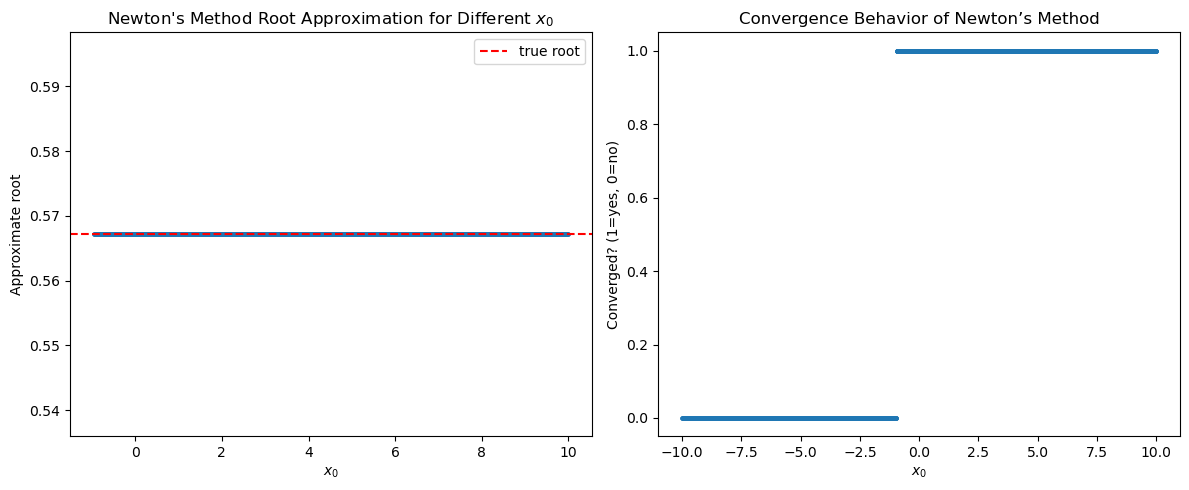

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * np.exp(x) - 1

def fp(x):
    return np.exp(x) * (1 + x)

def newton(x0, tol=1e-10, max_iter=100):
    x = x0
    for k in range(max_iter):
        d = fp(x)
        if d == 0:  # derivative zero → divergence
            return None, k, "zero derivative"
        
        x_new = x - f(x)/d
        
        if np.isnan(x_new) or np.isinf(x_new):
            return None, k, "overflow"
        
        if abs(x_new - x) < tol:
            return x_new, k, "converged"
        
        x = x_new
    
    return None, max_iter, "no convergence"

# Sweep initial values and test convergence

x0_values = np.linspace(-10, 10, 2000)
x0_values = x0_values[abs(x0_values + 1) > 1e-6]  # avoid exactly -1

converged = []
root_values = []

for x0 in x0_values:
    root, iters, status = newton(x0)
    converged.append(1 if status == "converged" else 0)
    root_values.append(root if root is not None else np.nan)

plt.figure(figsize=(12,5))

# Plot 1: root approximation vs initial x0
plt.subplot(1,2,1)
plt.scatter(x0_values, root_values, s=5)
plt.axhline(0.5671432904097838, color='red', linestyle='--', label='true root')
plt.xlabel("$x_0$")
plt.ylabel("Approximate root")
plt.title("Newton's Method Root Approximation for Different $x_0$")
plt.legend()

# Plot 2: convergence flag
plt.subplot(1,2,2)
plt.scatter(x0_values, converged, s=5)
plt.xlabel("$x_0$")
plt.ylabel("Converged? (1=yes, 0=no)")
plt.title("Convergence Behavior of Newton’s Method")

plt.tight_layout()
plt.show()

### 8. Logarithmic convergence graph
Finally, to study the convergence behavior of Newton's method, we plot the error. 
n this step, we investigate numerically whether Newton’s method converges for different initial guesses

### $$∣xk​−x\*∣.$$
as a function of the iteration number k, using a logarithmic scale on the vertical axis.

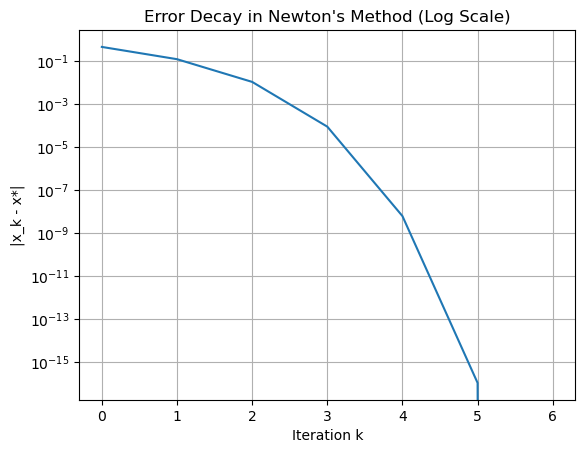

In [27]:
def newton_iterations(x0, eps=1e-14, max_iter=50):
    x = x0
    xs = [x]
    for _ in range(max_iter):
        x_new = x - f(x)/fprime(x)
        xs.append(x_new)
        if abs(x_new - x) < eps:
            break
        x = x_new
    return xs

xs = newton_iterations(1)
x_star = xs[-1]
errors = [abs(x - x_star) for x in xs]

plt.semilogy(errors)
plt.xlabel("Iteration k")
plt.ylabel("|x_k - x*|")
plt.title("Error Decay in Newton's Method (Log Scale)")
plt.grid(True)
plt.show()


The resulting graph shows a nearly straight line on the logarithmic scale once the iterations get close to the root. This behavior is characteristic of the quadratic convergence of Newton’s method.
Quadratic convergence means that, when the sequence is sufficiently close to 𝑥\*.
In fact,
-The error decreases very quickly after the first few iterations.
-The straight-line behavior in the log plot confirms that Newton’s method achieves the expected quadratic convergence.


This numerical experiment verifies that Newton’s method not only converges for 𝑥0∈𝑅+, but also does so at a quadratically fast rate, making it one of the most powerful root-finding algorithms for smooth functions